<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/Image%20Processing/Image_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Feature Extraction

This notebook contains the practical examples and exercises for the Applied AI-Image Processing.

*Created by Hansi Hettiarachchi*

# Drive and File Setup

You can find more details about this step in **Image Manipulation - Part 1** notebook.

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip file
# import shutil
# shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images.zip', '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data', 'zip')

## Accessing Data

Let's define a variable that holds the path to the data folder so we can reuse it without rewriting this long path.

<font color='red'>Note: Please make sure to update the following path with where your sample_images folder is located.</font>

In [ ]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images'

# Image Vectorisation

Converting matrix to an array or vector.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os  # to handle file paths

height, width, channels: (434, 296, 3)


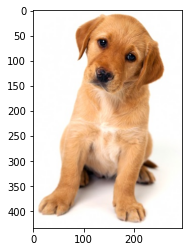

In [ ]:
# load an image using its file path
img = cv2.imread(os.path.join(data_folder, 'puppy.jpg'))

print(f'height, width, channels: {img.shape}')

# show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# vectorise colour image
vector = img.flatten()

print(f'length of feature vector: {len(vector)}')

length of feature vector: 385392


In [ ]:
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# vectorise grayscaled image
vector = img_grayscaled.flatten()

print(f'length of feature vector: {len(vector)}')

length of feature vector: 128464


### <font color='green'>**Activity 1**</font>

Explain how the above feature vectors got their lengths. Why do they differ for the same image?

# Edge Detection

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import prewitt_h, prewitt_v, prewitt, sobel_h, sobel_v, sobel, laplace

import os  # to handle file paths

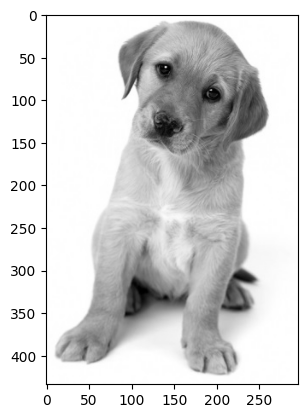

In [ ]:
# load an image using its file path
img = cv2.imread(os.path.join(data_folder, 'puppy.jpg'))

# Let's convert the colour image to a grayscale image because we do not need colour information to detect edges.
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show image
plt.imshow(cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB))

## Prewitt Transform

Find the **horizontal edges** using the Prewitt transform.

Refer to the [documentation](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt_h) for more details.

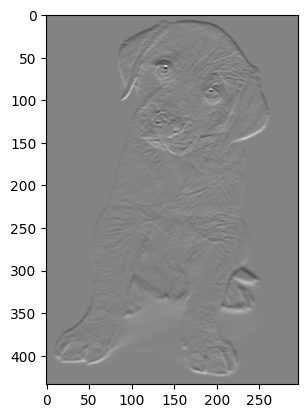

In [ ]:
edges_prewitt_h = prewitt_h(img_grayscaled)

plt.imshow(edges_prewitt_h, cmap='gray')

Find the **vertical edges** using the Prewitt transform.

Refer to the [documentation](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt_v) for more details.

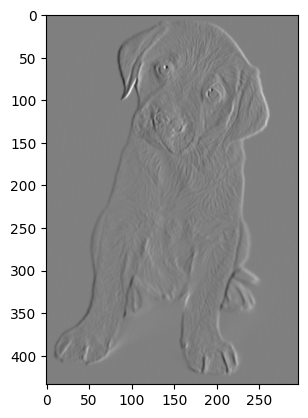

In [ ]:
edges_prewitt_v = prewitt_v(img_grayscaled)

plt.imshow(edges_prewitt_v, cmap='gray')

Find **combined edges** using the Prewitt transform.

Refer to the [documentation](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt) for more details.

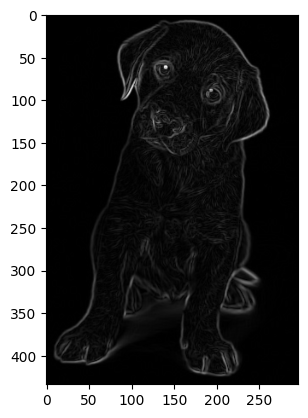

In [ ]:
edges_prewitt = prewitt(img_grayscaled)

plt.imshow(edges_prewitt, cmap='gray')

## Sobel Transform

Similar to the Prewitt transform, both horizontal and vertical edges can be extracted using the functions: <i>sobel_h</i> and <i>sobel_v</i>.

Refer to the following documentation for more details.
- [sobel_h](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_h)
- [sobel_v](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_v)
- [sobel](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel)



Let's find the **combined edges** using Sobel tranform.

True

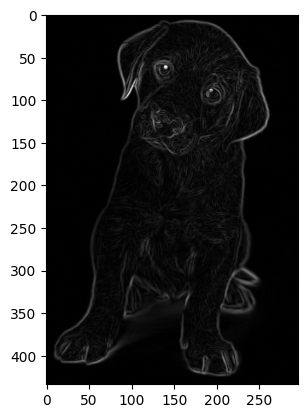

In [ ]:
edges_sobel = sobel(img_grayscaled)

plt.imshow(edges_sobel, cmap='gray')

cv2.imwrite("/content/solbel.jpg", edges_sobel)

## Laplace Transform

Unlike the Prewitt and Sobel transform, the Laplace transform uses a second derivative gradient operator. And it uses a single kernel.

Refer to the [documentation](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.laplace) for more details.

True

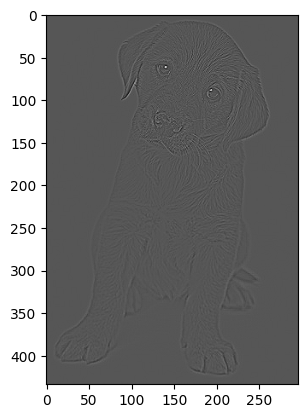

In [ ]:
edges_laplace = laplace(img_grayscaled)

plt.imshow(edges_laplace, cmap='gray')

## <font color='green'>**Activity 2**</font>

Compare the outputs of Sobel and Laplace transform. What are the main differences you noticed?

## Canny Edge Detector

Canny edge detection is an optimal algorithm composed of four main steps for edge detection.
1. Noise reduction
2. Finding intensity gradient of the image
3. Non-maximum suppression
4. Hysteresis thresholding

Refer to this [tutorial](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html) for more details.

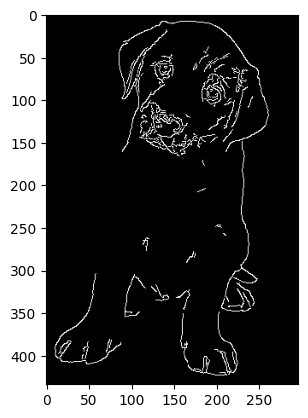

In [ ]:
edges_canny = cv2.Canny(img_grayscaled, 100, 200)

plt.imshow(edges_canny, cmap='gray')

## <font color='green'>**Activity 3**</font>

Find the optimal min and max threshold values that can capture all the important edges of the image above.

# HOG Feature Descriptor

The HOG feature descriptor counts the occurrences of gradient orientation in localised portions of an image as features.

Refer to the [documentation](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog) for more details about the <i>hog</i> function.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.feature import hog

import os  # to handle file paths

height, width, channels: (434, 296, 3)


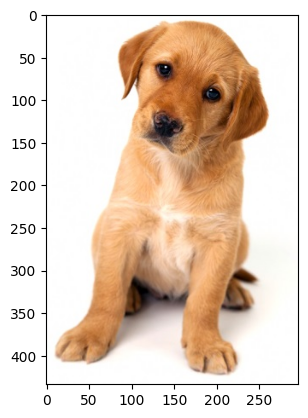

In [ ]:
# load an image using its file path
img = cv2.imread(os.path.join(data_folder, 'puppy.jpg'))

# check image size
print(f'height, width, channels: {img.shape}')

# show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Let's use the parameters from the *Histograms of Oriented Gradients for Human Detection* paper for this example.


resized image - height, width, channels: (128, 64, 3)


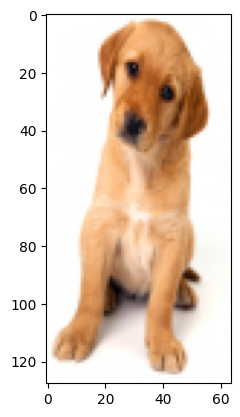

In [ ]:
# Resize image, if necessary
img_resized = cv2.resize(img, (64, 128), interpolation=cv2.INTER_AREA)

print(f'resized image - height, width, channels: {img_resized.shape}')

plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

length of feature vector: 3780


<ipython-input-59-ae7544793e13>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),


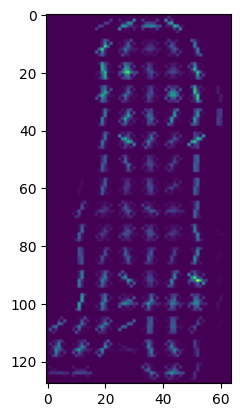

In [ ]:
# Get HOG features
fd, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

print(f'length of feature vector: {len(fd)}')

plt.imshow(hog_image)

## <font color='green'>**Activity 4**</font>

Apply the hog function to extract feature descriptors of the tiger.jpg in the sample_images folder.

# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that uses the singular value decomposition of the data to project it to a lower dimensional space.

Refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) of <i>PCA</i> for more details.

Also, this [tutorial](https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e) explains how to use PCA for machine learning.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
# Define an array to use with PCA
X = np.array([[-1, -1, 1], [-2, -1, -1], [-3, -2, -1], [1, 1, 2], [2, 1, 0], [3, 2, 2]])

print(f'Original data:\n {X}')
print(f'Shape of original data: {X.shape}')

Original data:
 [[-1 -1  1]
 [-2 -1 -1]
 [-3 -2 -1]
 [ 1  1  2]
 [ 2  1  0]
 [ 3  2  2]]
Shape of original data: (6, 3)


In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

X_new = pca.transform(X)


print(f'Shape of transformed data: {X_new.shape}')
print(f'Transformed data:\n {X_new}')

Shape of transformed data: (6, 2)
Transformed data:
 [[ 1.09846548 -0.96442861]
 [ 2.62012346  0.55337181]
 [ 3.90461936  0.05254945]
 [-1.84258717 -0.88999636]
 [-1.87600176  1.30105315]
 [-3.90461936 -0.05254945]]


**More resources**
* [PCA: Should you use PCA? How many components to use? How to interpret them?](https://towardsdatascience.com/pca-102-should-you-use-pca-how-many-components-to-use-how-to-interpret-them-da0c8e3b11f0#:~:text=The%20common%20way%20of%20selecting,as%20possible%20of%20that%20threshold.)
* [Choosing the Number of Components of Principal Component Analysis](https://rlrocha.medium.com/choosing-the-number-of-components-of-principal-component-analysis-36902a887520)
* [Principal Component Analysis: In-depth understanding through image visualization](https://towardsdatascience.com/principal-component-analysis-in-depth-understanding-through-image-visualization-892922f77d9f)